# Project 3 - Big Data 
Authors: James Cevallos and Yash Huilgol <br />
Date: April 12th, 2021



### Problem 1: 
Utilizing the COVID19 Global Forecasting data, forecast the number of daily cases and deaths: You may choose a cutoff date, and use the numbers before that date as the training samples, and the numbers after that date as the testing samples. Alternatively, you may choose a subset of countries as the training samples, and the rest of countries as the testing samples.

In [55]:
#the following code will import the data 
#import pandas as pd
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV, KFold
#from sklearn import ensemble

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib


df = pd.read_csv('data-proj-3a.csv', dtype = {'Id':int,
                                              'County':object,
                                              'Province_State':object,
                                              'Country_Region':object,
                                              'Population':float,
                                              'Weight':float, 
                                              'Date': object,
                                              'Target':object,
                                              'TargetValue':float})
#change the data type of date 
df['Date'] = pd.to_datetime(df['Date'])
                                            
#the following code will subset the first 5 rows
df.head(5)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-01-23,ConfirmedCases,0.0
1,2,NaN,NaN,Afghanistan,27657145.0,0.583587,2020-01-23,Fatalities,0.0
2,3,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-01-24,ConfirmedCases,0.0
3,4,NaN,NaN,Afghanistan,27657145.0,0.583587,2020-01-24,Fatalities,0.0
4,5,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-01-25,ConfirmedCases,0.0


In [56]:
#the following code will shows all the Country's within the data set 
df.Country_Region.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [57]:
df[(df.Country_Region == "Afghanistan") & (df.Target == 'ConfirmedCases')]

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-01-23,ConfirmedCases,0.0
2,3,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-01-24,ConfirmedCases,0.0
4,5,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-01-25,ConfirmedCases,0.0
6,7,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-01-26,ConfirmedCases,0.0
8,9,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-01-27,ConfirmedCases,0.0
...,...,...,...,...,...,...,...,...,...
270,271,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-06-06,ConfirmedCases,582.0
272,273,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-06-07,ConfirmedCases,791.0
274,275,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-06-08,ConfirmedCases,575.0
276,277,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-06-09,ConfirmedCases,542.0


In [58]:
df[(df.Country_Region == "Ecuador") & (df.Target == 'ConfirmedCases')]

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
29960,29961,NaN,NaN,Ecuador,16545799.0,0.060163,2020-01-23,ConfirmedCases,0.0
29962,29963,NaN,NaN,Ecuador,16545799.0,0.060163,2020-01-24,ConfirmedCases,0.0
29964,29965,NaN,NaN,Ecuador,16545799.0,0.060163,2020-01-25,ConfirmedCases,0.0
29966,29967,NaN,NaN,Ecuador,16545799.0,0.060163,2020-01-26,ConfirmedCases,0.0
29968,29969,NaN,NaN,Ecuador,16545799.0,0.060163,2020-01-27,ConfirmedCases,0.0
...,...,...,...,...,...,...,...,...,...
30230,30231,NaN,NaN,Ecuador,16545799.0,0.060163,2020-06-06,ConfirmedCases,1153.0
30232,30233,NaN,NaN,Ecuador,16545799.0,0.060163,2020-06-07,ConfirmedCases,392.0
30234,30235,NaN,NaN,Ecuador,16545799.0,0.060163,2020-06-08,ConfirmedCases,258.0
30236,30237,NaN,NaN,Ecuador,16545799.0,0.060163,2020-06-09,ConfirmedCases,539.0


In [59]:
import matplotlib.pyplot as plt
import numpy as np

#the following function creates a plot of covid cases or fatalities by country 
def covid_by_country(country, cases_or_fatalities): 
    data_frame = df[(df.Country_Region == country) & (df.Target == cases_or_fatalities)]
    subset = data_frame[['Date','TargetValue']]
    
    fig = plt.figure(figsize = (30,6))
    plt.plot(subset.Date, subset.TargetValue);
    plt.xticks(rotation = 45, fontsize = 25);
    plt.yticks(fontsize = 25);
    plt.xlabel("Date" , fontsize = 20)
    if (cases_or_fatalities == "ConfirmedCases"): 
        plt.ylabel("The Number of Confirmed Cases", fontsize = 20)
        plt.title("COVID 19 Cases for " + country + " by Date", fontsize = 25)
    else:
        plt.ylabel("The Number of Fatalities", fontsize = 20)
        plt.title("COVID 19 Fatalities for " + country + " by Date", fontsize = 25)
        
    
    return plt.show()

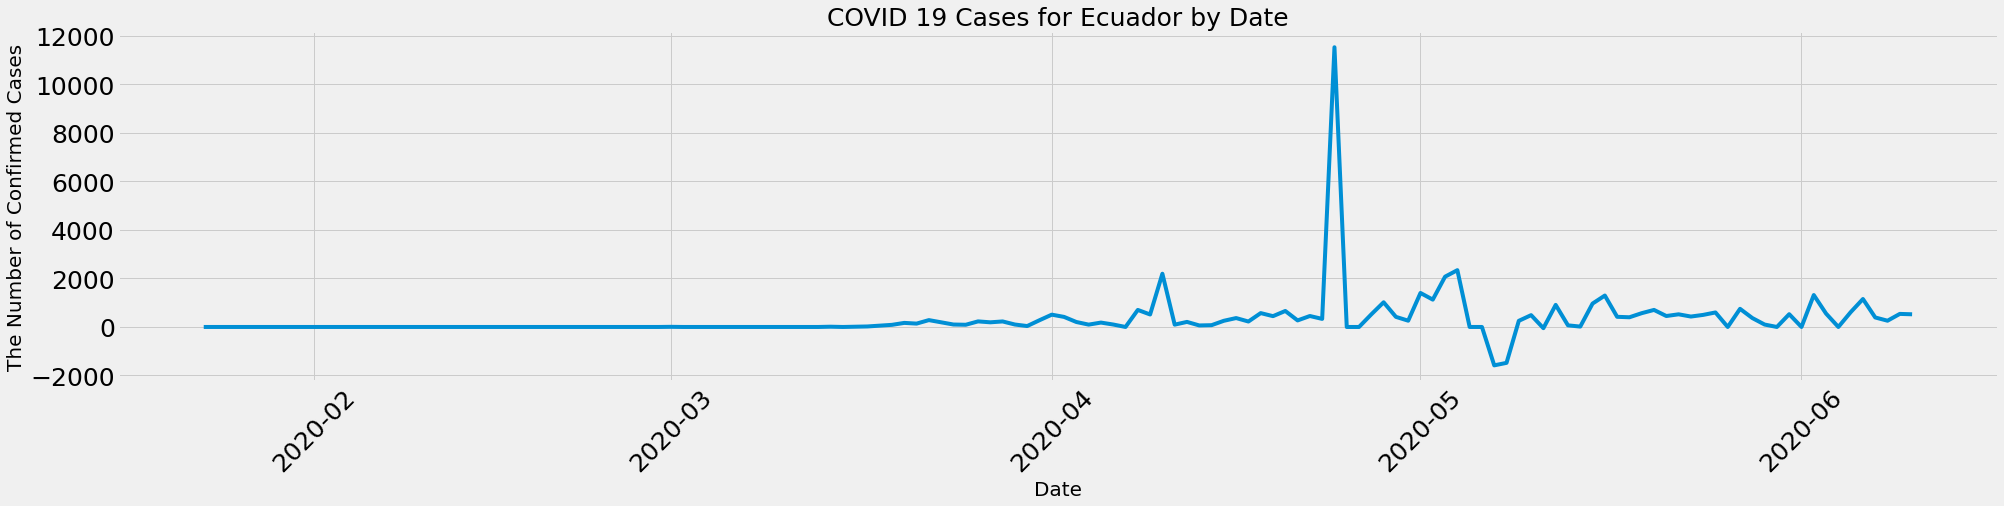

In [60]:
covid_by_country("Ecuador", "ConfirmedCases")

In [61]:
countries_A_G = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana']

countries_H_Z = ['Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Korea, South', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia',
       'Lebanon', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'MS Zaandam', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico',
       'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway',
       'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
       'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan*',
       'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'US', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']

# Select half the countries (that start with A-G) as training sample (if this is an issue w/ time series, then only use data April or later)
train_cases = df.loc[(df['Target'] == "ConfirmedCases") & 
                    (df['Country_Region'].isin(countries_A_G))
                   ]

train_fatalities = df.loc[(df['Target'] == "Fatalities") & 
                    (df['Country_Region'].isin(countries_A_G))
                   ]

# The other half of countries (H-Z) as test sample
test_cases = df.loc[(df['Target'] == "ConfirmedCases") & 
                    (df['Country_Region'].isin(countries_H_Z))
                   ]

# The other half of countries (H-Z) as test sample
test_fatalities = df.loc[(df['Target'] == "Fatalities") & 
                    (df['Country_Region'].isin(countries_H_Z))
                   ]

In [62]:
# Spotcheck: Did it work? (It did)

train_cases.head(2)


,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
0,1,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-01-23,ConfirmedCases,0.0
2,3,NaN,NaN,Afghanistan,27657145.0,0.058359,2020-01-24,ConfirmedCases,0.0


In [63]:
# Spotcheck: Did it work? (It did)

test_cases.head(2)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
38920,38921,NaN,NaN,Haiti,11078033.0,0.06165,2020-01-23,ConfirmedCases,0.0
38922,38923,NaN,NaN,Haiti,11078033.0,0.06165,2020-01-24,ConfirmedCases,0.0


In [64]:
# Spotcheck: Did it work? (It did)

train_fatalities.head(2)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
1,2,NaN,NaN,Afghanistan,27657145.0,0.583587,2020-01-23,Fatalities,0.0
3,4,NaN,NaN,Afghanistan,27657145.0,0.583587,2020-01-24,Fatalities,0.0


In [65]:
# Spotcheck: Did it work? (It did)

test_fatalities.head(2)

,Id,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
38921,38922,NaN,NaN,Haiti,11078033.0,0.616505,2020-01-23,Fatalities,0.0
38923,38924,NaN,NaN,Haiti,11078033.0,0.616505,2020-01-24,Fatalities,0.0


Prof doesnt grade based on method used or prediction error

Linear Model
Use to more complex ones like random forest or neural network

Timeseries: work inside each country to 

To test: 
- Use loss function. For continuous variable, use MSE
If the model has a low MSE, that doesnt mean the model feel better. Loss function might be the same for the test dataset and training dataset. Based on teh loss function, people will train model in train dataset. Then they will predict the prediction error.

In [66]:
train_cases = train_cases.set_index('Date')
train_fatalities = train_fatalities.set_index('Date')


Use this link to provide inspiration for timeseries data: https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

And for trouble shooting: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [67]:
train_cases.index
train_fatalities.index

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04',
               '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
               '2020-06-09', '2020-06-10'],
              dtype='datetime64[ns]', name='Date', length=19460, freq=None)

In [68]:
# Index with Time Series Data (by Day)
y = train_cases['TargetValue'].resample('D').mean()
fatal = train_fatalities['TargetValue'].resample('D').mean()


In [69]:
# Make sure you did it right
y['2020':]

Date
2020-01-23      1.366906
2020-01-24      4.000000
2020-01-25      7.000000
2020-01-26      9.697842
2020-01-27     11.568345
                 ...    
2020-06-06    338.784173
2020-06-07    286.690647
2020-06-08    258.309353
2020-06-09    355.762590
2020-06-10    388.280576
Freq: D, Name: TargetValue, Length: 140, dtype: float64

In [70]:
fatal['2020':]

Date
2020-01-23     0.014388
2020-01-24     0.115108
2020-01-25     0.230216
2020-01-26     0.201439
2020-01-27     0.374101
                ...    
2020-06-06    10.582734
2020-06-07     7.172662
2020-06-08    12.812950
2020-06-09    13.021583
2020-06-10    14.172662
Freq: D, Name: TargetValue, Length: 140, dtype: float64

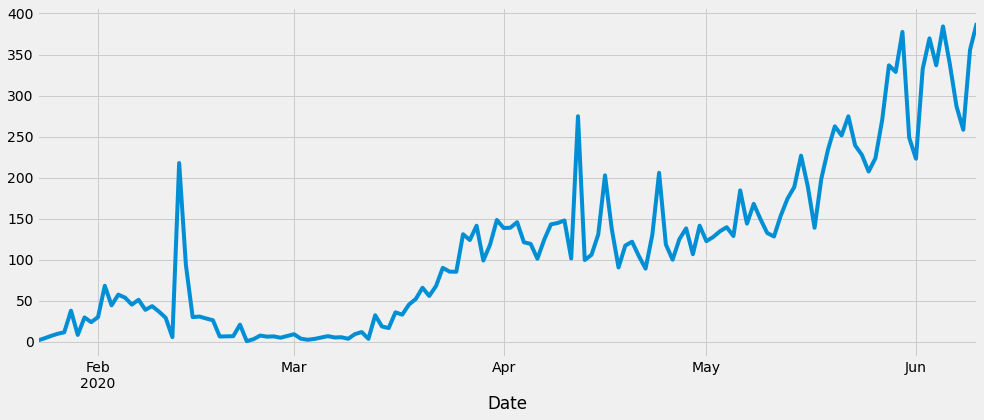

In [71]:
# Visualize Time Series
y.plot(figsize=(15,6))
plt.show()

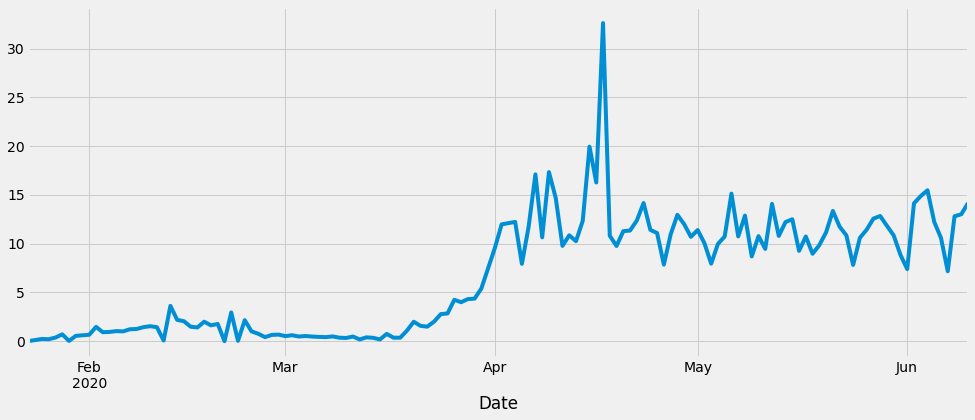

In [72]:
# The issue here is that the mean is substantially less. I think this is due to the fact that the US data is split by state/province.
fatal.plot(figsize=(15,6))
plt.show()

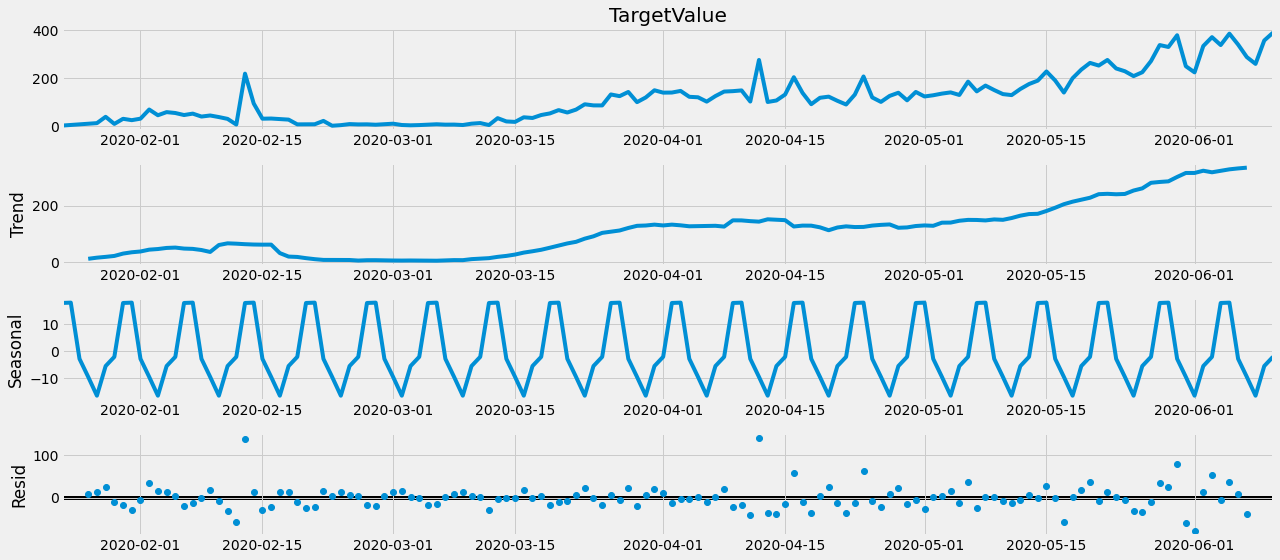

In [73]:
# Do distinguishable patterns appear when you plot the data (e.g. Seasonality?)
# Just telling you information about the data; not necessarily related to model fit. 

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [74]:
# Forecast with ARIMA (Autoregressive Integrated Moving Average)

In [75]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# 7 in this function refers to the period in the seasonal trend above
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [76]:
for param in pdq:
    for param_seasonal in seasonal_pdq: 
        mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        
# Lowest value appears to be the following line, which means this is the optimal option
# ARIMA(0, 1, 1)x(0, 1, 1, 7)7 - AIC:1251.2533005226228

ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:1797.725220706816
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:1600.1999686631716
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:1411.264872301578
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:1342.0104789124375
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:1414.4704847566875
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:1396.3582068288756
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:1351.7663965287006
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:1341.4561558124997
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:1659.153098981408
ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:1524.3640611424798
ARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:1389.9108391721036
ARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:1316.8516940151308
ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:1408.6104612898948
ARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:1368.4690398415246
ARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:1335.7845521009956
ARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:1316.2104698632263
ARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:1432.4618043886362
ARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:1365.7187158978866
ARIMA(0, 1, 0)x(0, 1, 0, 7)7 - 

In [77]:
#Choose the model with the lowest AIC and then run that with the testing sample

mod = sm.tsa.statespace.SARIMAX(y, order=(0, 1, 1), seasonal_order=(0, 0, 1, 7), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6874      0.058    -11.852      0.000      -0.801      -0.574
ma.S.L7        0.2463      0.078      3.170      0.002       0.094       0.399
sigma2      1445.5125     97.807     14.779      0.000    1253.814    1637.211


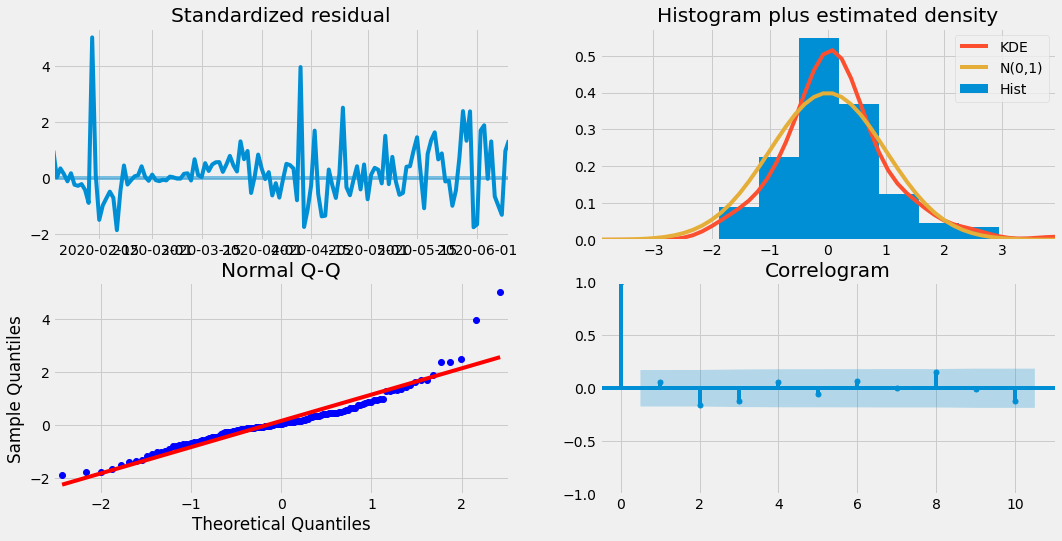

In [78]:
# Run Diagnostics

results.plot_diagnostics(figsize=(16, 8))
plt.show()

# This supports the notion that our model is nearly normally distributed

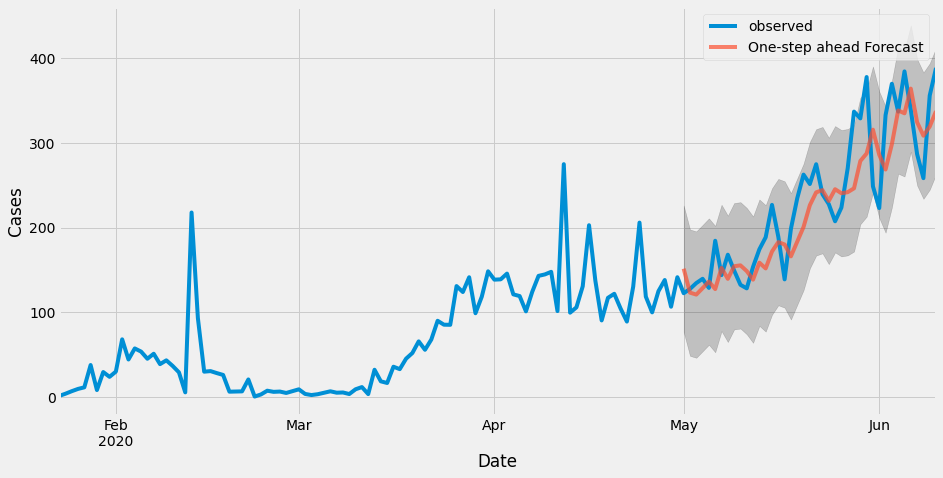

In [79]:
# Validating forecasts using the training dataset; visualize how it does.

pred = results.get_prediction(start=pd.to_datetime('2020-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
plt.legend()
plt.show()

In [80]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-06-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 2409.67
The Root Mean Squared Error of our forecasts is 49.09


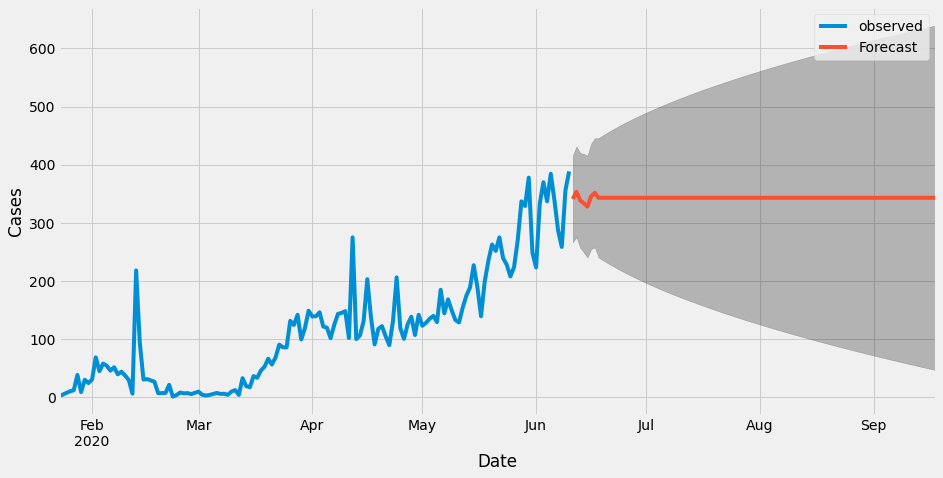

In [81]:
#Predict 100 days of model y

pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
plt.legend()
plt.show()

In [82]:
# Now validate with the test dataset, z

test_cases = test_cases.set_index('Date')

z = test_cases['TargetValue'].resample('D').mean()

mod = sm.tsa.statespace.SARIMAX(z, order=(0, 1, 1), seasonal_order=(0, 0, 1, 7), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3588      0.074     -4.844      0.000      -0.504      -0.214
ma.S.L7        0.2042      0.074      2.773      0.006       0.060       0.348
sigma2         8.2194      0.866      9.494      0.000       6.523       9.916


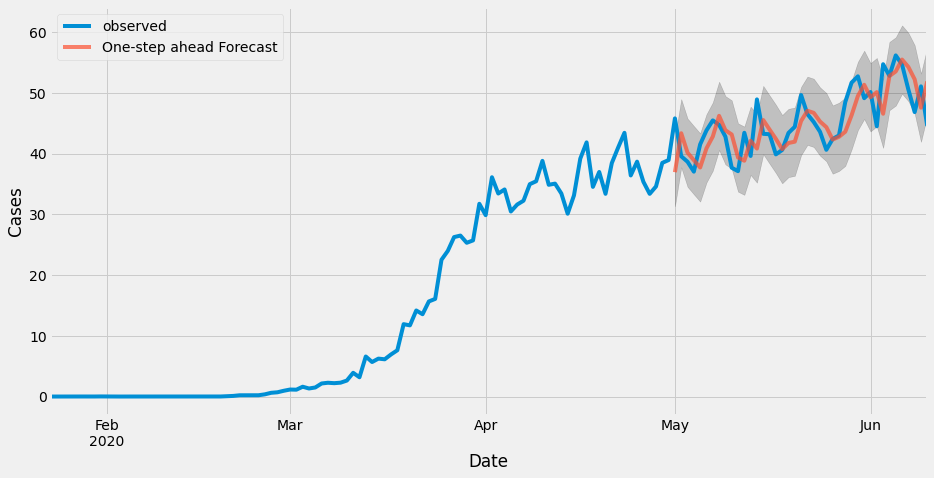

In [83]:
# Validating forecasts using the testing dataset; visualize how it does.

pred = results.get_prediction(start=pd.to_datetime('2020-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = z['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
plt.legend()
plt.show()

In [84]:
z_forecasted = pred.predicted_mean
z_truth = z['2020-06-01':]
mse = ((z_forecasted - z_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

# This is a freaking awesome model bc MSE is so low!

The Mean Squared Error of our forecasts is 21.56
The Root Mean Squared Error of our forecasts is 4.64


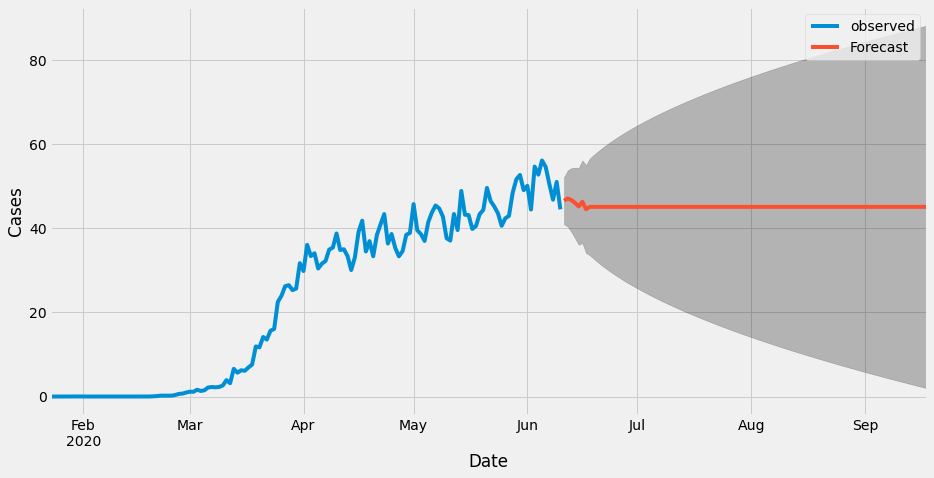

In [85]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
bx = z.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=bx, label='Forecast')
bx.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
bx.set_xlabel('Date')
bx.set_ylabel('Cases')
plt.legend()
plt.show()

## Next perform same set of analysis but just for fatalities 

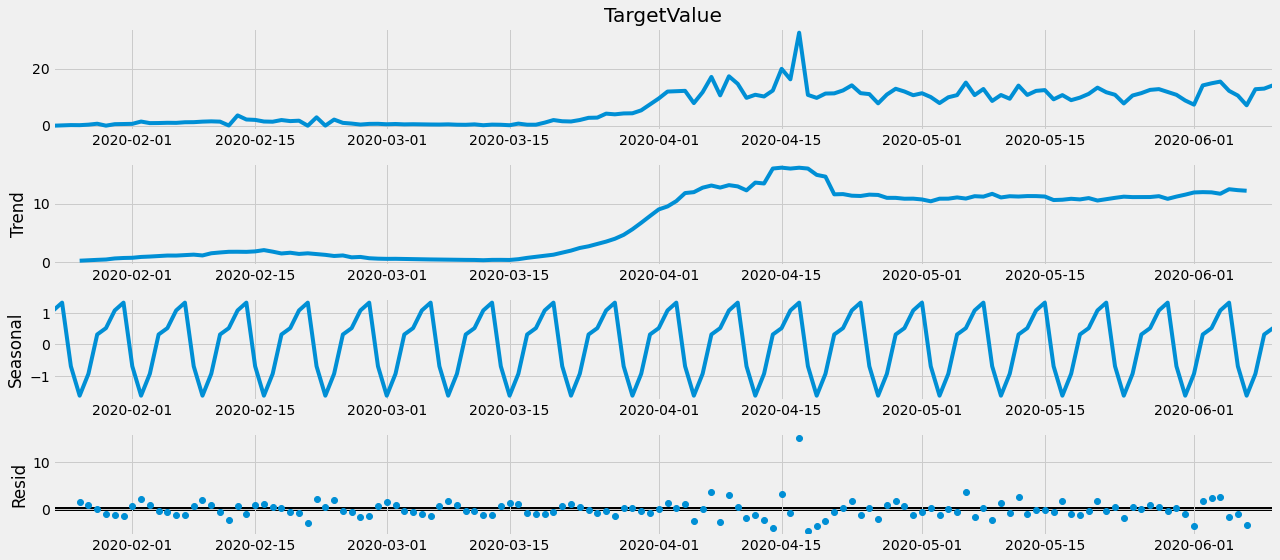

In [86]:
# Do distinguishable patterns appear when you plot the data (e.g. Seasonality?)
# Just telling you information about the data; not necessarily related to model fit. 

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(fatal, model='additive')
fig = decomposition.plot()
plt.show()

In [87]:
# Forecast with ARIMA (Autoregressive Integrated Moving Average)

In [88]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

# 7 in this function refers to the period in the seasonal trend above
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 1, 0, 7)
SARIMAX: (0, 1, 0) x (0, 1, 1, 7)
SARIMAX: (0, 1, 0) x (1, 0, 0, 7)


In [89]:
parameters = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(fatal,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
        aic = results.aic
        parameters.append([param,param_seasonal,aic])

result_table = pd.DataFrame(parameters)
result_table.columns = ['parameters',     'parameters_seasonal','aic']
result_table = result_table.sort_values(by='aic',ascending = True).reset_index(drop = True)
minimum = result_table['aic'].min()
a = result_table.loc[result_table['aic'] == minimum]
print(' The best combination that gives the lowest AIC is:')
print(a)


ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:1006.4174932630208
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:863.9069611252712
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:713.1766671704763
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:680.7394378150659
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:718.8711208432026
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:713.8407151675437
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:684.8796420935555
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:682.3412413875404
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:894.9432415442866
ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:807.2379514794438
ARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:707.4474920723173
ARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:669.6764477468429
ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:716.6671021224524
ARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:702.7822820449785
ARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:678.7252583049951
ARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:671.6764300118151
ARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:711.3358115364596
ARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:684.06517083171
ARIMA(0, 1, 0)x(0, 1, 0, 7)7 - AIC:768.12263207

In [90]:
#Choose the model with the lowest AIC and then run that with the testing sample

mod = sm.tsa.statespace.SARIMAX(fatal, order=(0, 1, 1), seasonal_order=(0, 1, 1, 7), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6568      0.034    -19.176      0.000      -0.724      -0.590
ma.S.L7       -0.8304      0.059    -13.977      0.000      -0.947      -0.714
sigma2         7.4098      0.380     19.511      0.000       6.665       8.154


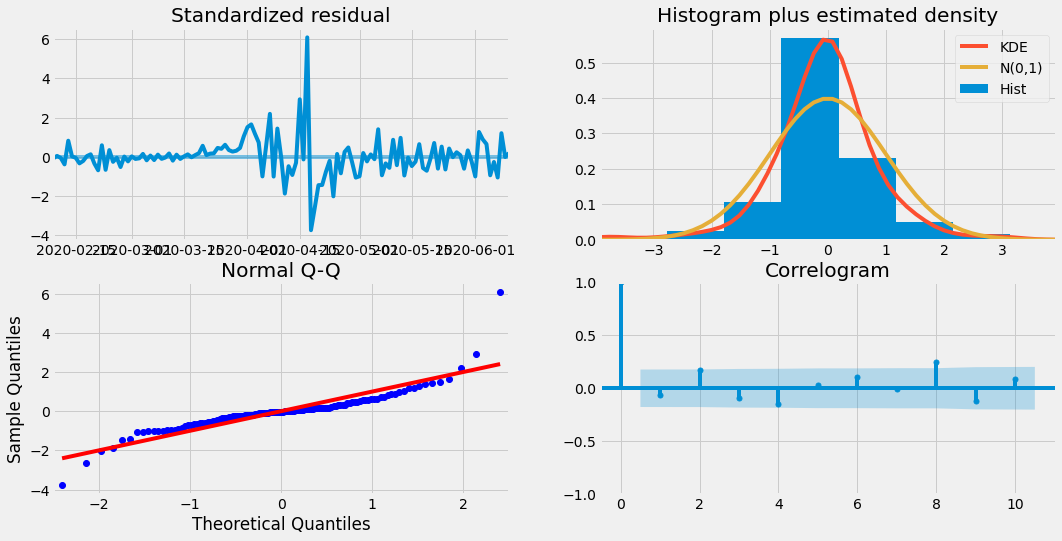

In [91]:
# Run Diagnostics

results.plot_diagnostics(figsize=(16, 8))
plt.show()

# This supports the notion that our model is nearly normally distributed

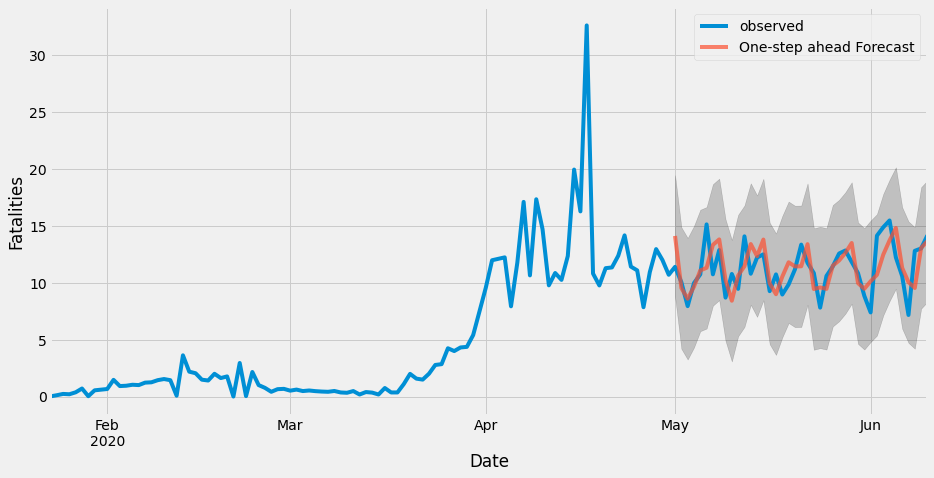

In [92]:
# Validating forecasts using the training dataset; visualize how it does.

pred = results.get_prediction(start=pd.to_datetime('2020-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = fatal['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Fatalities')
plt.legend()
plt.show()

In [93]:
fatal_forecasted = pred.predicted_mean
fatal_truth = fatal['2020-06-01':]
mse = ((fatal_forecasted - fatal_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


##holy moly so low!!!!!

The Mean Squared Error of our forecasts is 5.47
The Root Mean Squared Error of our forecasts is 2.34


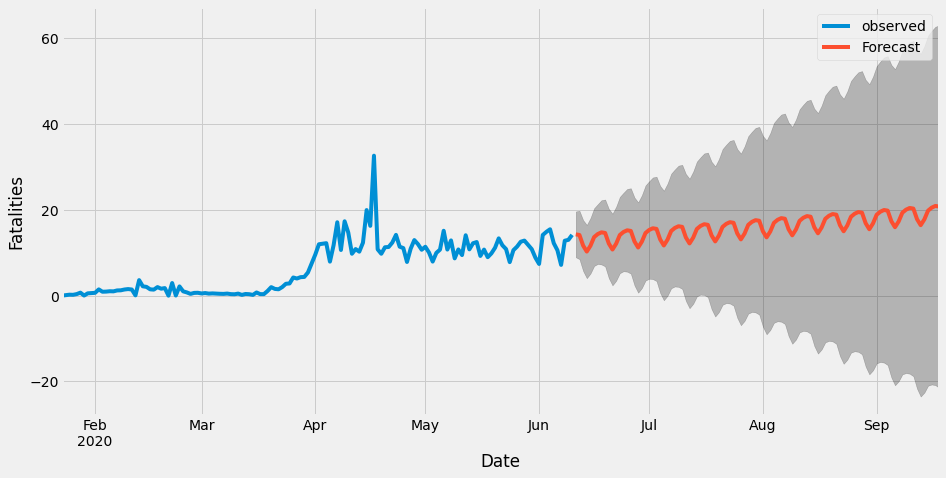

In [94]:
#Predict 100 days of model z

pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = fatal.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Fatalities')
plt.legend()
plt.show()

In [95]:
# Now validate with the test dataset

test_fatalities = test_fatalities.set_index('Date')

yo = test_fatalities['TargetValue'].resample('D').mean()

mod = sm.tsa.statespace.SARIMAX(yo, order=(0, 1, 1), seasonal_order=(0, 1, 1, 7), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6180      0.060    -10.248      0.000      -0.736      -0.500
ma.S.L7       -0.5997      0.044    -13.693      0.000      -0.685      -0.514
sigma2         0.0687      0.004     18.682      0.000       0.062       0.076


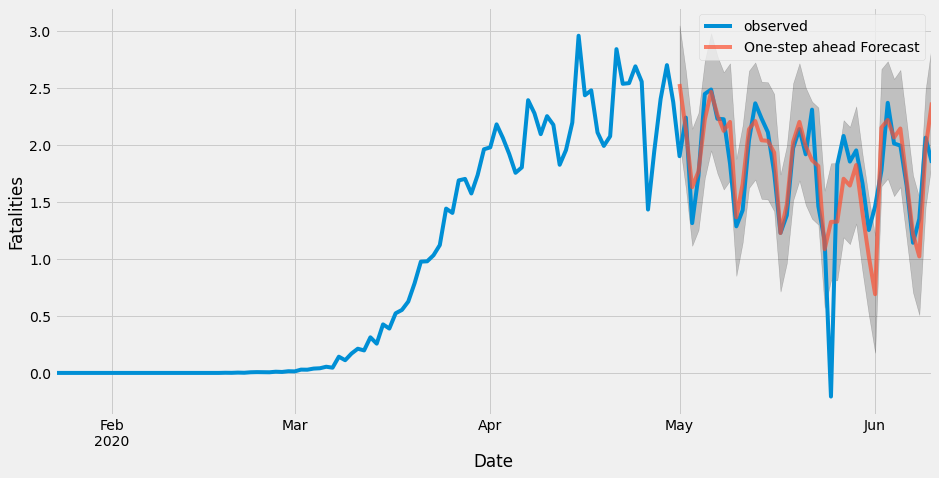

In [96]:
# Validating forecasts using the testing dataset; visualize how it does.

pred = results.get_prediction(start=pd.to_datetime('2020-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = yo['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Fatalities')
plt.legend()
plt.show()

In [97]:
yo_forecasted = pred.predicted_mean
yo_truth = yo['2020-06-01':]
mse = ((yo_forecasted - yo_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

# This is a freaking awesome model bc MSE is so low!

The Mean Squared Error of our forecasts is 0.12
The Root Mean Squared Error of our forecasts is 0.34


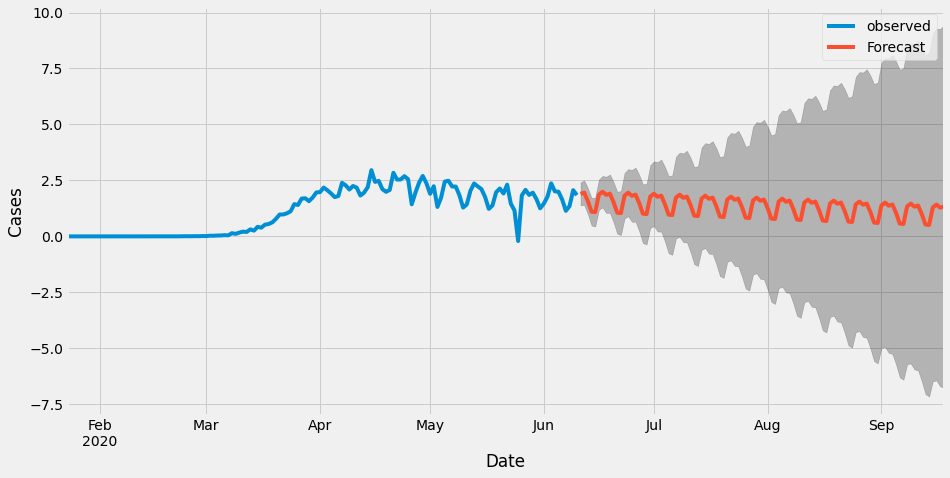

In [98]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
bx = yo.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=bx, label='Forecast')
bx.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
bx.set_xlabel('Date')
bx.set_ylabel('Cases')
plt.legend()
plt.show()

### Mental Health Services

In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib


#this data comes from the CDC and can be found here https://data.cdc.gov/NCHS/Indicators-of-Anxiety-or-Depression-Based-on-Repor/8pt5-q6wp
#more information about this survey can be found here https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm
mental_health = pd.read_csv('Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv')

In [4]:
mental_health['Indicator'].value_counts()

Symptoms of Anxiety Disorder or Depressive Disorder    1928
Symptoms of Depressive Disorder                        1928
Symptoms of Anxiety Disorder                           1928
Name: Indicator, dtype: int64

In [5]:
#Find Quarter 1 and Quarter 2 Symptoms of Depressive Disorder Value 
mental_health_data = mental_health.loc[(mental_health['Indicator'] == "Symptoms of Depressive Disorder") & 
                                       (mental_health['Group'] == "By Age")]
mental_health_data = mental_health_data.drop(columns = ['Indicator','State', 'Group', 'Phase', 'Time Period', 'Quartile Range','Time Period Label','Time Period End Date', 'Low CI', 'High CI','Confidence Interval'])
mental_health_data = mental_health_data.dropna(axis =0, how = 'any')

mental_health_data = mental_health_data.groupby(by = 'Time Period Start Date')
mental_health_data = mental_health_data.mean()
mental_health_data.head(70)

#April 23rd, 2020 Average Value for Symptoms of Depressive Disorder
#04/23/2020 12:00:00 21.828571

#January 6th, 2021 for Symptoms of Depressive Disorder
#01/06/2021 12:00:00 AM	26.657143

,Value
Time Period Start Date,
01/06/2021 12:00:00 AM,26.657143
01/20/2021 12:00:00 AM,26.100000
02/03/2021 12:00:00 AM,25.942857
02/17/2021 12:00:00 AM,25.642857
03/03/2021 12:00:00 AM,24.714286
03/17/2021 12:00:00 AM,23.257143
04/23/2020 12:00:00 AM,21.828571
05/07/2020 12:00:00 AM,21.771429
05/14/2020 12:00:00 AM,22.528571


In [6]:
#Find Quarter 1 and Quarter 2 Symptoms of Anxiety Disorder
mental_health_data = mental_health.loc[(mental_health['Indicator'] == "Symptoms of Anxiety Disorder") & 
                                       (mental_health['Group'] == "By Age")]
mental_health_data = mental_health_data.drop(columns = ['Indicator','State', 'Group', 'Phase', 'Time Period', 'Quartile Range','Time Period Label','Time Period End Date', 'Low CI', 'High CI','Confidence Interval'])
mental_health_data = mental_health_data.dropna(axis =0, how = 'any')

mental_health_data = mental_health_data.groupby(by = 'Time Period Start Date')
mental_health_data = mental_health_data.mean()
mental_health_data.head(30)

# April 23rd, 2020 Symptoms of Anxiety Disorder
#04/23/2020 12:00:00 AM	27.942857

# January 6th, 2021 for Symptoms of Anxiety Disorder
#01/06/2021 12:00:00 AM	33.171429

,Value
Time Period Start Date,
01/06/2021 12:00:00 AM,33.171429
01/20/2021 12:00:00 AM,32.900000
02/03/2021 12:00:00 AM,31.257143
02/17/2021 12:00:00 AM,30.785714
03/03/2021 12:00:00 AM,29.200000
03/17/2021 12:00:00 AM,27.914286
04/23/2020 12:00:00 AM,27.942857
05/07/2020 12:00:00 AM,26.985714
05/14/2020 12:00:00 AM,25.342857


In [7]:
#Find Quarter 1 and Quarter 2 Symptoms of Anxiety Disorder or Depressive Disorder 
mental_health_data = mental_health.loc[(mental_health['Indicator'] == "Symptoms of Anxiety Disorder or Depressive Disorder") & 
                                       (mental_health['Group'] == "By Age")]
mental_health_data = mental_health_data.drop(columns = ['Indicator','State', 'Group', 'Phase', 'Time Period', 'Quartile Range','Time Period Label','Time Period End Date', 'Low CI', 'High CI','Confidence Interval'])
mental_health_data = mental_health_data.dropna(axis =0, how = 'any')

mental_health_data = mental_health_data.groupby(by = 'Time Period Start Date')
mental_health_data = mental_health_data.mean()
mental_health_data.head(30)

#April 23rd, 2020 for Symptoms of Anxiety Disorder or Depressive Disorder 
# 04/23/2020 12:00:00 AM	33.228571

#January 6th, 2021 for Symptoms of Anxiety Disorder or Depressive Disorder 
# 01/06/2021 12:00:00 AM	38.600000

,Value
Time Period Start Date,
01/06/2021 12:00:00 AM,38.600000
01/20/2021 12:00:00 AM,38.200000
02/03/2021 12:00:00 AM,36.557143
02/17/2021 12:00:00 AM,36.085714
03/03/2021 12:00:00 AM,34.371429
03/17/2021 12:00:00 AM,32.871429
04/23/2020 12:00:00 AM,33.228571
05/07/2020 12:00:00 AM,31.185714
05/14/2020 12:00:00 AM,30.900000


In [8]:
mental_health_df = pd.DataFrame(
    {"January, 2019": [8.3,6.7,11.0], 
     "April, 2019": [8.1,6.5,10.9],
     "April, 2020": [21.828571,27.942857,33.228571], 
     "January, 2021": [26.657143,33.171429,38.600000]},
    index = ['Symptoms of Anxiety Disorder', 'Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder and/or Depressive Disorder'])

print(mental_health_df)

                                                    January, 2019  \
Symptoms of Anxiety Disorder                                  8.3   
Symptoms of Depressive Disorder                               6.7   
Symptoms of Anxiety Disorder and/or Depressive ...           11.0   

                                                    April, 2019  April, 2020  \
Symptoms of Anxiety Disorder                                8.1    21.828571   
Symptoms of Depressive Disorder                             6.5    27.942857   
Symptoms of Anxiety Disorder and/or Depressive ...         10.9    33.228571   

                                                    January, 2021  
Symptoms of Anxiety Disorder                            26.657143  
Symptoms of Depressive Disorder                         33.171429  
Symptoms of Anxiety Disorder and/or Depressive ...      38.600000  


In [15]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

numbers = pd.DataFrame(
    {'Symptoms of Anxiety Disorder': [8.3,8.1,21.828571,26.657143],
     'Symptoms of Depressive Disorder':[6.7,6.5, 27.942857, 33.171429],
     'Symptoms of Anxiety Disorder and/or Depressive Disorder':[11.0,10.9,33.228571,38.600000]},
    index = ["January, 2019","April, 2019","April, 2020","January, 2021"])
        

  
print(numbers)

chi2_contingency(numbers)



               Symptoms of Anxiety Disorder  Symptoms of Depressive Disorder  \
January, 2019                      8.300000                         6.700000   
April, 2019                        8.100000                         6.500000   
April, 2020                       21.828571                        27.942857   
January, 2021                     26.657143                        33.171429   

               Symptoms of Anxiety Disorder and/or Depressive Disorder  
January, 2019                                          11.000000        
April, 2019                                            10.900000        
April, 2020                                            33.228571        
January, 2021                                          38.600000        


(1.2973597447027192,
 0.9718030889361269,
 6,
 array([[ 7.24268627,  8.29512424, 10.46218948],
        [ 7.10340385,  8.13560262, 10.26099353],
        [23.12088283, 26.48058861, 33.39852757],
        [27.41874105, 31.40297053, 39.60686042]]))

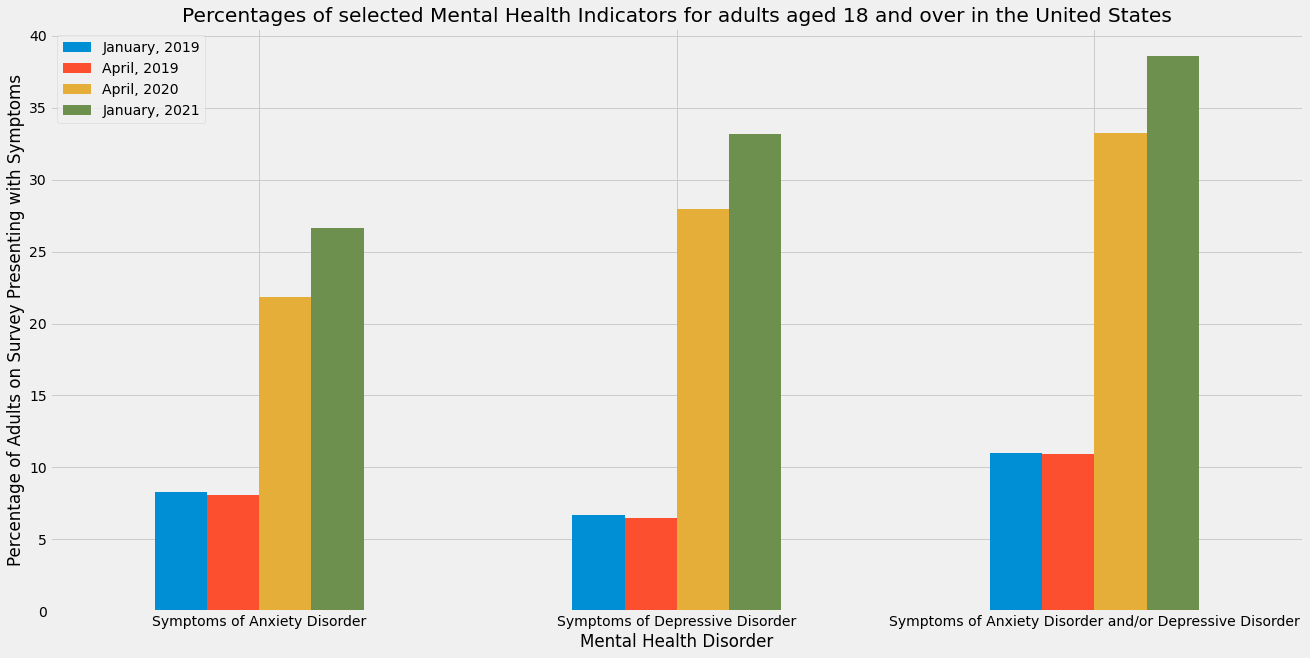

In [141]:
#bar plot of data frame above

ax = mental_health_df.plot.bar(rot =0, figsize = (20,10), title ="Percentages of selected Mental Health Indicators for adults aged 18 and over in the United States", xlabel = "Mental Health Disorder", ylabel = "Percentage of Adults on Survey Presenting with Symptoms")



AttributeError: 'AxesSubplot' object has no attribute 'savefig'

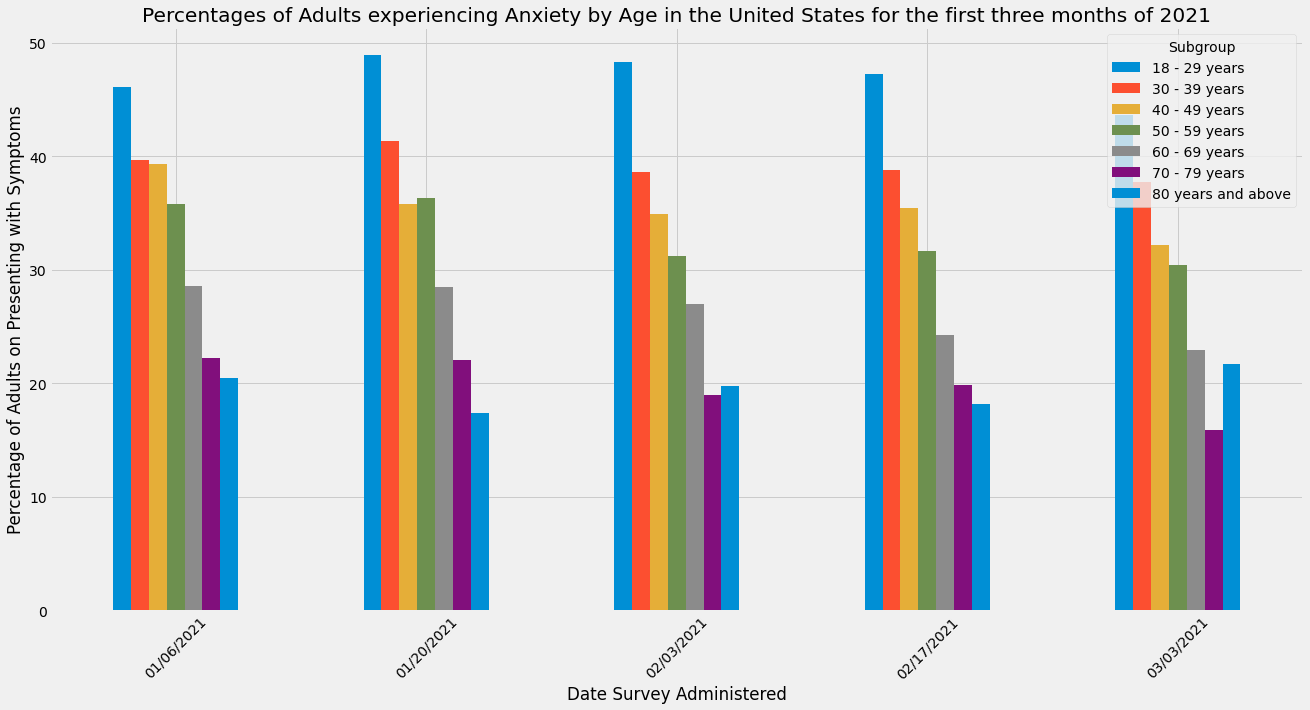

In [144]:
#plot of Symptoms of Anxiety Disorder by Age 

mental_health['Time Period Start Date'] = mental_health['Time Period Start Date'].str.slice(stop = 10)
mental_health_by_age = mental_health.loc[(mental_health['Indicator'] == "Symptoms of Anxiety Disorder") & 
                                         (mental_health['Group'] == "By Age")]

simple = mental_health_by_age.drop(columns = ['State', 'Group', 'Phase', 'Time Period', 'Quartile Range', 'Indicator', 'Time Period Label','Time Period End Date', 'Low CI', 'High CI','Confidence Interval'])
simple = simple.pivot(index = 'Time Period Start Date', columns = "Subgroup", values = "Value")
simple = simple.dropna(axis =0, how = 'any')
simple = simple[0:5]
ax = simple.plot.bar(rot =45, figsize = (20,10), title = "Percentages of Adults experiencing Anxiety by Age in the United States for the first three months of 2021", xlabel = "Date Survey Administered", ylabel = "Percentage of Adults on Presenting with Symptoms")
